Dữ liệu đã được lưu vào nem_xien_data.csv
   ThoiGian (s)  ToaDoX (m)  ToaDoY (m)
0      0.000000    0.000000    0.000000
1      0.029153    0.412286    0.408122
2      0.058306    0.824572    0.807914
3      0.087459    1.236858    1.199378
4      0.116612    1.649145    1.582512


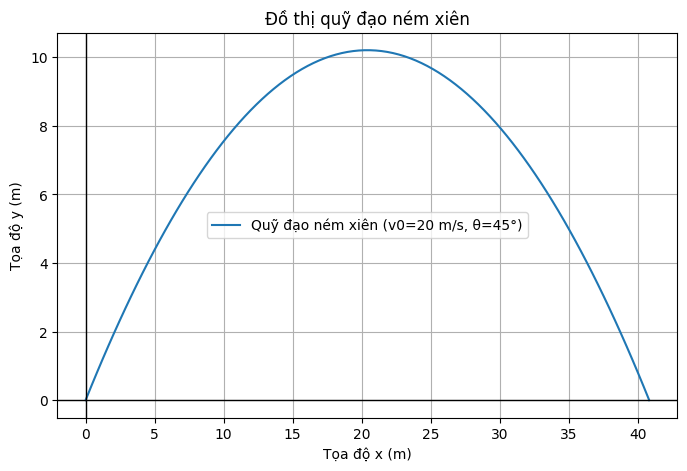

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def DoThiNemXien(v0, theta_deg, g=9.8, filename="nem_xien_data.csv"):
    """
    Vẽ đồ thị quỹ đạo của chuyển động ném xiên và lưu tọa độ vào file CSV.
    
    Tham số:
    - v0: Vận tốc ban đầu (m/s)
    - theta_deg: Góc ném (độ)
    - g: Gia tốc trọng trường (m/s^2), mặc định là 9.8
    - filename: Tên file CSV để lưu dữ liệu
    
    Trả về:
    - t: Mảng thời gian
    - x, y: Mảng tọa độ theo các thời điểm của t
    """
    theta = np.radians(theta_deg)  # Chuyển đổi góc sang radian
    
    # Thời gian bay tối đa
    t_max = 2 * v0 * np.sin(theta) / g
    
    # Chia nhỏ thời gian để vẽ đồ thị
    t = np.linspace(0, t_max, num=100)
    
    # Tính tọa độ x, y theo thời gian
    x = v0 * np.cos(theta) * t
    y = v0 * np.sin(theta) * t - 0.5 * g * t**2
    
    # Lưu tọa độ vào DataFrame và ghi vào file CSV
    df = pd.DataFrame({"ThoiGian (s)": t, "ToaDoX (m)": x, "ToaDoY (m)": y})
    df.to_csv(filename, index=False)
    
    print(f"Dữ liệu đã được lưu vào {filename}")
    
    # Đọc lại dữ liệu từ file CSV
    df_read = pd.read_csv(filename)
    print(df_read.head())
    
    # Vẽ đồ thị quỹ đạo
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label=f"Quỹ đạo ném xiên (v0={v0} m/s, θ={theta_deg}°)")
    plt.xlabel("Tọa độ x (m)")
    plt.ylabel("Tọa độ y (m)")
    plt.title("Đồ thị quỹ đạo ném xiên")
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.legend()
    plt.grid()
    plt.show()
    
    return t, x, y

# Ví dụ sử dụng
t_vals, x_coords, y_coords = DoThiNemXien(20, 45)
